In [1]:
#-------------------------------------------------------------
# template iPython notebook to get data out of the database
#-------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import SciServer.CasJobs as cj

In [2]:
    # template query
    # create a parametrized query string and execute
    # note the '' around the string valued constant in the where clause
    #
    state="Washington"
    sql="""
    select dd, cases, deaths
    from StatsS
    where state='{0}'
    order by dd
    """.format(state);
    out=cj.executeQuery(sql,"COVIDNYT");
 

dd  cases  deaths
0    0      1       0
1    1      1       0
2    2      1       0
3    3      1       0
4    4      1       0
..  ..    ...     ...
67  67   4311     191
68  68   4896     207
69  69   5179     221
70  70   5292     226
71  71   5588     249

[72 rows x 3 columns]

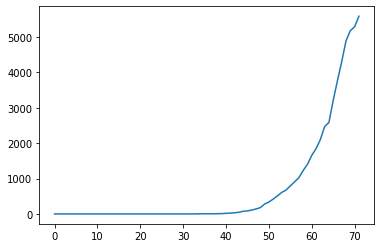

In [13]:
# plot it
plt.plot(out.dd,out.cases);

In [15]:
# template query
# create a Python function to get the data for a fixed pattern
#
def getStateData(state):
    sql="""
    select dd, cases, deaths
    from StatsS
    where state='{0}'
    order by dd
    """.format(state);
    out=cj.executeQuery(sql,"COVIDNYT");
    return out

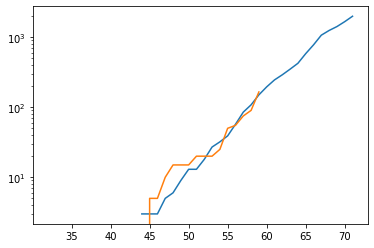

In [40]:
# shift the dates of deaths wrt to infections by a certain days and scale up
out=getStateData("Maryland")
plt.semilogy(out.dd,out.cases)
plt.semilogy(out.dd-12,5*out.deaths)
plt.show();

In [47]:
# and a more complicated template query to show the cases per 100000 people
# for each of the states, denoted by their postal code
#
sql="""
----------------------------------
-- example to create a wide table 
-- of deaths / 100000 people
----------------------------------
select dd,
        ISNULL([1],0) [AL],ISNULL([2],0) [AK],ISNULL([4],0) [AZ],ISNULL([5],0) [AR],
        ISNULL([6],0) [CA],ISNULL([8],0) [CO],ISNULL([9],0) [CT],ISNULL([10],0) [DE],
        ISNULL([12],0) [FL],ISNULL([13],0) [GA],ISNULL([15],0) [HI],ISNULL([16],0) [ID],
        ISNULL([17],0) [IL],ISNULL([18],0) [IN],ISNULL([19],0) [IA],ISNULL([20],0) [KS],
        ISNULL([21],0) [KY],ISNULL([22],0) [LA],ISNULL([23],0) [ME],ISNULL([24],0) [MD],
        ISNULL([25],0) [MA],ISNULL([26],0) [MI],ISNULL([27],0) [MN],ISNULL([28],0) [MS],
        ISNULL([29],0) [MO],ISNULL([30],0) [MT],ISNULL([31],0) [NE],ISNULL([32],0) [NV],
        ISNULL([33],0) [NH],ISNULL([34],0) [NJ],ISNULL([35],0) [NM],ISNULL([36],0) [NY],
        ISNULL([37],0) [NC],ISNULL([38],0) [ND],ISNULL([39],0) [OH],ISNULL([40],0) [OK],
        ISNULL([41],0) [OR],ISNULL([42],0) [PA],ISNULL([44],0) [RI],ISNULL([45],0) [SC],
        ISNULL([46],0) [SD],ISNULL([47],0) [TN],ISNULL([48],0) [TX],ISNULL([49],0) [UT],
        ISNULL([50],0) [VT],ISNULL([51],0) [VA],ISNULL([53],0) [WA],ISNULL([54],0) [WV],
        ISNULL([55],0) [WI],ISNULL([56],0) [WY],ISNULL([60],0) [AS],ISNULL([66],0) [GU],
        ISNULL([69],0) [MP],ISNULL([72],0) [PR],ISNULL([78],0) [VI]
from (
        select s.fips, s.dd, cast(cases as float)/c.Population*100000 val
        from statsS s, censusData c
        where s.fips=c.fips
        and dd>35
) x
pivot ( avg(val) for fips in (
    [1],[2],[4],[5],[6],[8],[9],[10],[12],[13],
    [15],[16],[17],[18],[19],[20],[21],[22],[23],
    [24],[25],[26],[27],[28],[29],[30],[31],[32],
    [33],[34],[35],[36],[37],[38],[39],[40],[41],
    [42],[44],[45],[46],[47],[48],[49],[50],[51],
    [53],[54],[55],[56],[60],[66],[69],[72],[78]
) ) p
order by dd
""";
out=cj.executeQuery(sql,"COVIDNYT");
out

dd         AL         AK         AZ         AR         CA         CO  \
0   36   0.000000   0.000000   0.015645   0.000000   0.069791   0.000000   
1   37   0.000000   0.000000   0.015645   0.000000   0.069791   0.000000   
2   38   0.000000   0.000000   0.015645   0.000000   0.072476   0.000000   
3   39   0.000000   0.000000   0.015645   0.000000   0.075160   0.000000   
4   40   0.000000   0.000000   0.015645   0.000000   0.088581   0.000000   
5   41   0.000000   0.000000   0.015645   0.000000   0.102003   0.000000   
6   42   0.000000   0.000000   0.031289   0.000000   0.120793   0.000000   
7   43   0.000000   0.000000   0.031289   0.000000   0.147635   0.000000   
8   44   0.000000   0.000000   0.031289   0.000000   0.179847   0.039768   
9   45   0.000000   0.000000   0.046934   0.000000   0.217427   0.159071   
10  46   0.000000   0.000000   0.078223   0.000000   0.268428   0.159071   
11  47   0.000000   0.000000   0.078223   0.000000   0.300639   0.159071   
12  48   0.000000   0.000000   0.093867   0.000000   0.461696   0.238607   
13  49   0.000000   0.000000   0.093867   0.000000   0.480486   0.338026   
14  50   0.000000   0.000000   0.140801   0.034295   0.542224   0.676052   
15  51   0.000000   0.140799   0.140801   0.205767   0.676438   0.974311   
16  52   0.125530   0.140799   0.140801   0.240062   0.858969   1.550944   
17  53   0.251060   0.140799   0.187734   0.308651   1.022710   2.048041   
18  54   0.481198   0.140799   0.203379   0.548712   1.283085   2.704210   
19  55   0.606728   0.422398   0.281601   0.754479   1.578356   3.201307   
20  56   0.815945   0.844796   0.312890   0.754479   1.964892   3.638753   
21  57   1.067005   1.267193   0.438046   1.131719   2.397061   4.294921   
22  58   1.631889   1.689591   0.735292   2.126260   2.864125   5.527723   
23  59   2.217696   1.971190   1.095116   3.429452   3.443930   7.237737   
24  60   2.740737   2.956784   1.627029   4.046753   4.144526   9.444850   
25  61   3.284700   3.097584   2.393611   5.658595   4.968600  11.751381   
26  62   4.100645   5.068773   3.660816   6.893198   6.012784  14.336288   
27  63   5.063041   5.913569   5.100112   7.956328   7.097233  18.134111   
28  64   8.075760   8.307156   6.289095  10.562711   8.544059  21.593909   
29  65  11.255852   9.715149   7.947413  12.037376  10.898171  28.473736   
30  66  13.368939  11.967937  10.403602  13.237684  13.190545  34.498556   
31  67  15.063593  14.361525  12.093209  14.026458  14.938011  40.980705   
32  68  17.364976  16.051116  14.533754  15.398238  16.819690  46.031215   
33  69  19.812810  16.755112  18.288437  17.421615  19.920032  52.254873   
34  70  20.900736  18.726302  20.306579  19.342108  23.036480  59.452843   
35  71  23.139353  20.134294  22.105698  21.399779  26.348880  66.531509   

           CT         DE         FL  ...         VA         WA         WV  \
0    0.000000   0.000000   0.000000  ...   0.000000   0.074355   0.000000   
1    0.000000   0.000000   0.000000  ...   0.000000   0.074355   0.000000   
2    0.000000   0.000000   0.000000  ...   0.000000   0.104096   0.000000   
3    0.000000   0.000000   0.000000  ...   0.000000   0.148709   0.000000   
4    0.000000   0.000000   0.010638  ...   0.000000   0.252805   0.000000   
5    0.000000   0.000000   0.010638  ...   0.000000   0.342031   0.000000   
6    0.000000   0.000000   0.015956  ...   0.000000   0.475869   0.000000   
7    0.000000   0.000000   0.015956  ...   0.000000   0.698933   0.000000   
8    0.000000   0.000000   0.021275  ...   0.000000   1.115318   0.000000   
9    0.000000   0.000000   0.037231  ...   0.000000   1.278898   0.000000   
10   0.000000   0.000000   0.063825  ...   0.012498   1.635800   0.000000   
11   0.027979   0.000000   0.069144  ...   0.024997   2.096798   0.000000   
12   0.055958   0.000000   0.074463  ...   0.062492   2.661892   0.000000   
13   0.055958   0.000000   0.122332  ...   0.099987   4.148983   0.000000   
14   0.083937   0.111367   0.138288 

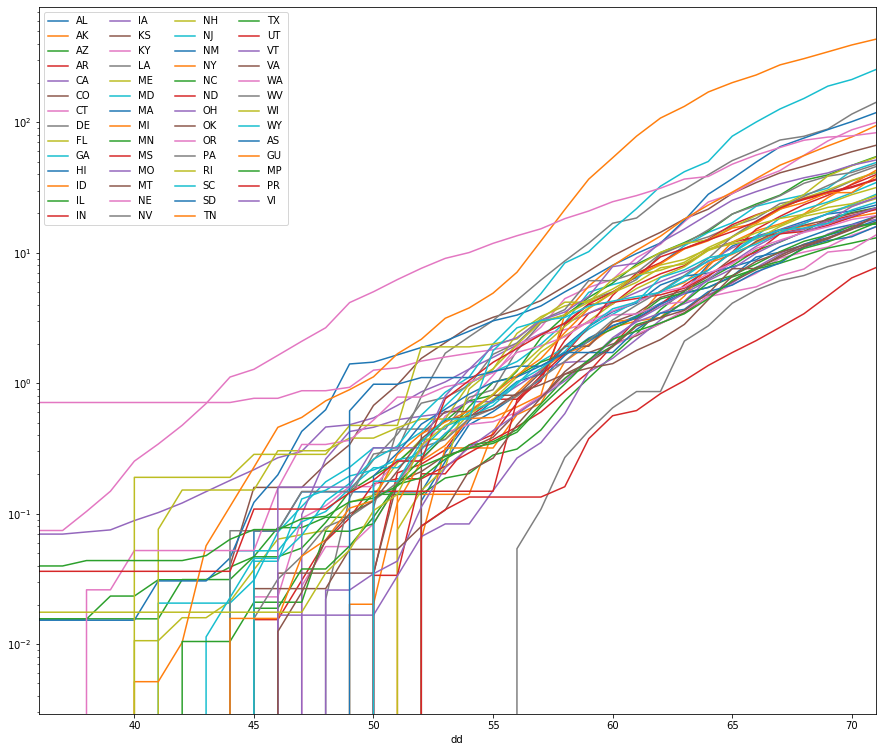

In [67]:
ax = out.plot(x="dd", logy=True, figsize=(15,13));
ax.legend(ncol=4)